Kyla Golston\
Module F: Ordinary Differential Equation - Initial Value Problems\
Sections 22.4-22.6\
Due Date: 4/10/22

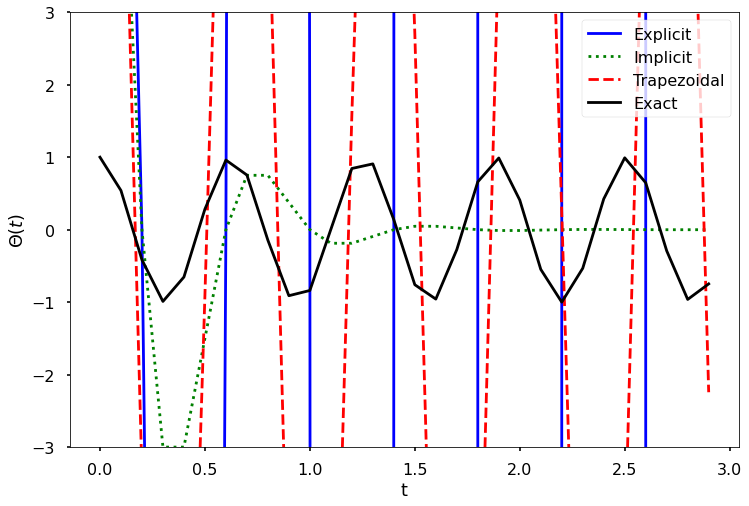

In [2]:
#Section 22.4 Numerical Error and Instability
#https://www.varsitytutors.com/ap_physics_1-help/pendulums

import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline 

# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 3, h)
# oscillation freq. of pendulum
w = 10
s0 = np.array([[12], [0]])

m_e = np.array([[1, h], 
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])
    
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

In [ ]:
#Section 22.5 Predictor-Corrector and Runge Kutta Methods

From the book: The predictor is an explicit formula and first estimates the solution at tj+1, i.e. we can use Euler method or some other methods to finish this step. After we obtain the solution S(tj+1), we can apply the corrector to improve the accuracy. Using the found S(tj+1) on the right-hand side of an otherwise implicit formula, the corrector can calculate a new, more accurate solution.

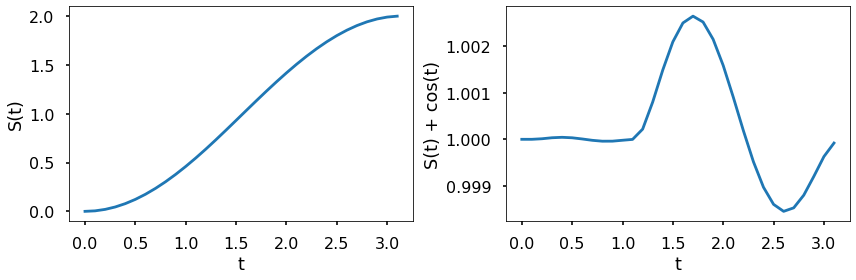

In [1]:
#Section 22.6 Python ODE Solvers
#Sin is the functon and cos is the derivative

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

F = lambda t, s: np.sin(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] + np.cos(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) + cos(t)')
plt.tight_layout()
plt.show()